# Importing  required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc


# Load dataset

In [2]:
columns = ["sentiment", "id", "date", "query", "user_id", "text"]
data = pd.read_csv('D:\\GitHub\\Datasets\\training.1600000.processed.noemoticon.csv',encoding="latin", names=columns)
data.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user_id    1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
data=data.drop(columns=['id','date','query','user_id'])

In [5]:
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
np.sum(data.isnull().any(axis=1))

0

In [7]:
set(data.sentiment)

{0, 4}

In [8]:
# replacing the '4' with '1' as positive sentiment
data.sentiment = data["sentiment"].replace(4,1) 
set(data.sentiment)

{0, 1}

<AxesSubplot:xlabel='sentiment', ylabel='count'>

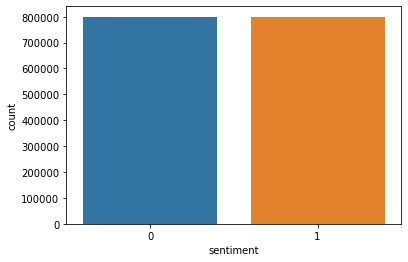

In [9]:
# plotting the data using countplot
sns.countplot(x="sentiment",data=data)

#  Data Pre-Processing 

In [11]:
data['text']=data.text.str.lower()

In [12]:

def remove_urls(text):          #remove urls from the text

    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    cleaned_text = re.sub(url_pattern, '', text)
    return cleaned_text

def remove_punctuation(text):   #remove punctuations from the text

    punctuation_pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    cleaned_text = re.sub(punctuation_pattern, '', text)
    return cleaned_text


def remove_numbers(text):      #remove numbers from the text

    number_pattern = re.compile(r'\d+')
    cleaned_text = re.sub(number_pattern, '', text)
    return cleaned_text

def remove_tags(text):        #remove tags from the text

    tag_pattern = re.compile(r'<.*?>')
    cleaned_text = re.sub(tag_pattern, '', text)
    return cleaned_text

def remove_non_alphanumeric(text):       #remove non-alphanumeric from the text

    cleaned_text = re.sub(r'\W+', ' ', text)
    return cleaned_text

def remove_repeating_characters(text):   #remove repeating characters from the text

    cleaned_text = re.sub(r'(\w)\1+', r'\1', text)
    return cleaned_text

    


In [13]:

data['text']=data['text'].apply(lambda x: remove_urls(x))
data['text']=data['text'].apply(lambda x: remove_tags(x))
data['text']=data['text'].apply(lambda x: remove_numbers(x))
data['text']=data['text'].apply(lambda x: remove_non_alphanumeric(x))
data['text']=data['text'].apply(lambda x: remove_punctuation(x))
data['text']=data['text'].apply(lambda x: remove_repeating_characters(x))
    

In [16]:
#remove stopwords 
def remove_stopwords(words_list):
    stop_words= ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
    return " ".join([word for word in str(words_list).split() if word not in stop_words])
data['text']=data['text'].apply(lambda text: remove_stopwords(text))

In [17]:
data

,sentiment,text
0,0,switchfot aw bumer shoulda got david car third...
1,0,upset update facebok texting might cry result ...
2,0,kenichan dived many times bal managed save res...
3,0,whole body fels itchy like fire
4,0,nationwideclas behaving al m mad se al
...,...,...
1599995,1,woke schol best feling ever
1599996,1,thewdb com col hear old walt interviews â
1599997,1,ready mojo makeover ask details
1599998,1,hapy th birthday bo al time tupac amaru shakur


(-0.5, 399.5, 199.5, -0.5)

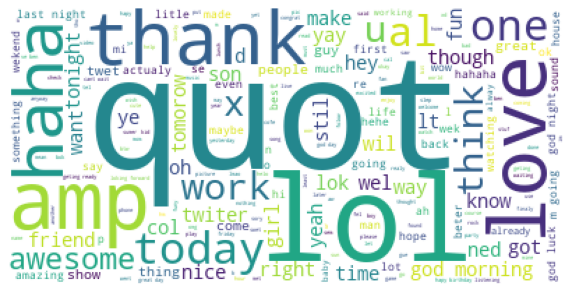

In [18]:
#creating a string of positive tweets to analyze the words
pos_tweets = data[data['sentiment'] == 1]['text'].tolist()
pos_tweets_string = " ".join(pos_tweets)
plt.figure(figsize=(10,15))
plt.imshow(WordCloud(background_color='white').generate(pos_tweets_string))
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

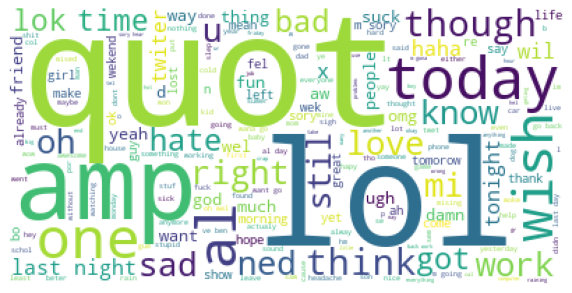

In [19]:
#creating a string of negitive tweets to analyze the words
neg_tweets = data[data['sentiment'] == 0]['text'].tolist()
neg_tweets_string = " ".join(neg_tweets)
plt.figure(figsize=(10,15))
plt.imshow(WordCloud(background_color='white').generate(neg_tweets_string))
plt.axis('off')

# Split dataset into train_test

In [25]:
x=data['text']
y=data['sentiment']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state =42)

# Term Frequency Inverse Document Frequncy Vectorization

In [27]:
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  4272678


In [28]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# model_Evaluate (confusion matrix, report, roc-auc)

In [29]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    sns.heatmap(cf_matrix, annot = np.asarray([f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]).reshape(2,2), cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()

# Perform Bernoulli_Naive_Bayes Algorithm

In [30]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)


BernoulliNB()

              precision    recall  f1-score   support

           0       0.78      0.80      0.79    159494
           1       0.79      0.78      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



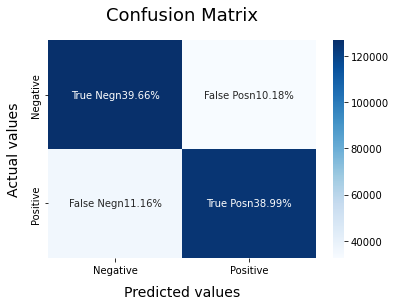

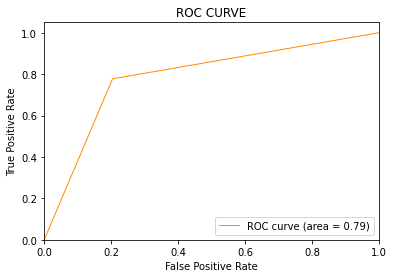

In [31]:
model_Evaluate(BNBmodel)